# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

Set the rng seed.

In [2]:
seed = 17

# Import and view data

In [3]:
df = pd.read_csv("data/train_prepd.csv")

In [4]:
display(df.head())
print(df.shape)

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,cabin_missing
0,0.0,3.0,22.0,7.2500,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


(891, 13)


In [5]:
df.describe()

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,cabin_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.951235,32.204208,0.904602,0.647587,0.086420,0.722783,0.204265,0.580247,0.140292,0.030303,0.771044
std,0.486592,0.836071,14.176038,49.693429,1.613459,0.477990,0.281141,0.447876,0.403390,0.493796,0.347485,0.171516,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split the data

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Build the model

Here we'll build the logistic regression model. We will first evaluate it on a simple train/test split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = seed)

Standardize the independent variables

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy: 82.12 %


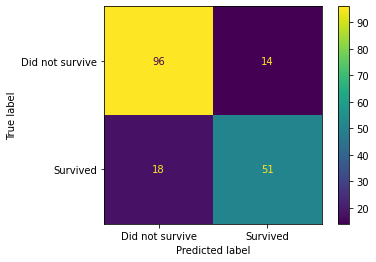

In [9]:
#build
classifier = LogisticRegression(random_state=seed)
classifier.fit(X_train, y_train)

#predict
y_pred = classifier.predict(X_test)

#results
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: {:.2f} %'.format(acc * 100))

plot_confusion_matrix(classifier, 
                     X_test,
                     y_test, display_labels=['Did not survive', 'Survived'])

Next, we will do 10-fold cross validation to get a more robust accuracy, as different train/test splits are expected to yield different accuracies. 

**NOTE:** Here I fit the scaler on the entire dataset before CV. This means we have data leakage, which I'm ignoring for now. The proper way to do this would be, for each of the k train/test splits in the CV to fit the scaler on the train split only, so as to not take into account the mean and st.dev of the test set in the standardization. 

**TODO**: Pipelines

In [10]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [11]:
# create model
classifier = LogisticRegression(random_state=seed)

# create cv tactic (stratified repeated 10-fold)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)

# evaluate with (stratified) 10-fold CV
scores = cross_val_score(classifier, X_sc, y, cv=cv)

# print the results
print('scores: ', scores )
print('Accuracy: {:.2f} %'.format(scores.mean() * 100))
print('St.dev: {:.4f}'.format(scores.std()))

scores:  [0.78888889 0.86516854 0.82022472 0.82022472 0.79775281 0.84269663
 0.85393258 0.84269663 0.87640449 0.84269663 0.85555556 0.80898876
 0.80898876 0.87640449 0.82022472 0.7752809  0.84269663 0.83146067
 0.88764045 0.84269663 0.91111111 0.85393258 0.83146067 0.82022472
 0.87640449 0.7752809  0.8988764  0.80898876 0.83146067 0.74157303
 0.83333333 0.84269663 0.82022472 0.7752809  0.83146067 0.86516854
 0.82022472 0.80898876 0.86516854 0.85393258 0.78888889 0.84269663
 0.83146067 0.83146067 0.79775281 0.85393258 0.88764045 0.83146067
 0.82022472 0.87640449]
Accuracy: 83.46 %
St.dev: 0.0341
